# Figure 2-G

In [1]:
from libraries import *
from parameters import *


In [2]:
os.getcwd()
os.chdir(projectDir)

In [3]:
%load_ext rpy2.ipython

In [4]:
adata = sc.read('outputs/anndata/adata-hash-features_singlets_05242020.h5ad')

/home/beraslan/miniconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/beraslan/miniconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata.shape

(519535, 13811)

In [ ]:
# adata.obs["subCellType"] = "DC2"
# adata.obs.loc[adata.obs.leiden.isin(['3']), "subCellType"] = "MacDC"
# adata.obs.loc[adata.obs.leiden.isin(['8']), "subCellType"] = "DC1"
# adata.obs.loc[adata.obs.leiden.isin(['5']), "subCellType"] = "MReg"

In [9]:
fBarMat = adata.obs[adata.uns['feature_barcode_names']]


In [10]:
fBarMat

,Arih1_1,Arih1_2,Arih1_3,Rnf212_1,Rnf212_2,Rnf212_3,Cbl_1,Cbl_2,Cbl_3,Ube3a_1,...,ONE_NONGENE_SITE_321,ONE_NONGENE_SITE_322,ONE_NONGENE_SITE_323,ONE_NONGENE_SITE_324,ONE_NONGENE_SITE_325,ONE_NONGENE_SITE_326,ONE_NONGENE_SITE_327,ONE_NONGENE_SITE_328,ONE_NONGENE_SITE_329,ONE_NONGENE_SITE_330
AAACCCAAGCGTTCCG-1-E3-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGAGATAG-1-E3-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTCCGCGT-1-E3-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAAAGGCTG-1-E3-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAGCACAGA-1-E3-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGGACATG-1-E4-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGCATCGATGT-1-E4-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTGTCACAT-1-E4-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTCAATCG-1-E4-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fBarMat[fBarMat>0] = 1
fBarMat["leiden"] = adata.obs['leiden']
fBarMat.shape

/tmp/ipykernel_5337/2104700504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat[fBarMat>0] = 1
/tmp/ipykernel_5337/2104700504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat[fBarMat>0] = 1
/tmp/ipykernel_5337/2104700504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat["leiden"] = adata.obs[

(519535, 3721)

In [12]:
allGuidesPerSCT = pd.DataFrame()

for elem in adata.uns['feature_barcode_names']:
    k = pd.DataFrame(pd.crosstab(fBarMat[elem], fBarMat.leiden))
    k = k.loc[k.index == 1,]
    k["KOGuide"] = elem
    allGuidesPerSCT = allGuidesPerSCT.append(k)

allGuidesPerSCT['noOfGuideCells'] = allGuidesPerSCT.loc[:,["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]].sum(axis=1)

leiden        0       1       2      3      4      5      6     7     8    9
Arih1_1                                                                     
0        161594  115462  104980  71197  25286  13839  12375  8358  5934  427
1            33      23      10     14      0      0      0     2     1    0
leiden    0   1   2   3  4  5  6  7  8  9
Arih1_1                                  
1        33  23  10  14  0  0  0  2  1  0
leiden        0       1       2      3      4      5      6     7     8    9
Arih1_2                                                                     
0        161570  115430  104969  71175  25278  13834  12373  8358  5927  427
1            57      55      21     36      8      5      2     2     8    0
leiden    0   1   2   3  4  5  6  7  8  9
Arih1_2                                  
1        57  55  21  36  8  5  2  2  8  0
leiden        0       1       2      3      4      5      6     7     8    9
Arih1_3                                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Rnf212_1                                                                     
0         161578  115447  104954  71184  25274  13833  12364  8358  5934  427
1             49      38      36     27     12      6     11     2     1    0
leiden     0   1   2   3   4  5   6  7  8  9
Rnf212_1                                    
1         49  38  36  27  12  6  11  2  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf212_2                                                                     
0         161604  115459  104969  71193  25285  13839  12372  8360  5934  427
1             23      26      21     18      1      0      3     0     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Rnf212_2                                  
1         23  26  21  18  1  0  3  0  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf212_3                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Cbl_1                                                                      
0       161540  115406  104930  71148  25257  13831  12367  8353  5927  427
1           87      79      60     63     29      8      8     7     8    0
leiden   0   1   2   3   4  5  6  7  8  9
Cbl_1                                    
1       87  79  60  63  29  8  8  7  8  0
leiden       0       1       2      3      4      5      6     7     8    9
Cbl_2                                                                      
0       161615  115476  104978  71208  25282  13839  12374  8358  5934  427
1           12       9      12      3      4      0      1     2     1    0
leiden   0  1   2  3  4  5  6  7  8  9
Cbl_2                                 
1       12  9  12  3  4  0  1  2  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Cbl_3                                                                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Ube3a_1                                                                     
0        161541  115424  104935  71179  25274  13830  12365  8356  5935  427
1            86      61      55     32     12      9     10     4     0    0
leiden    0   1   2   3   4  5   6  7  8  9
Ube3a_1                                    
1        86  61  55  32  12  9  10  4  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Ube3a_2                                                                     
0        161556  115435  104950  71180  25278  13836  12369  8358  5931  426
1            71      50      40     31      8      3      6     2     4    1
leiden    0   1   2   3  4  5  6  7  8  9
Ube3a_2                                  
1        71  50  40  31  8  3  6  2  4  1
leiden        0       1       2      3      4      5      6     7     8    9
Ube3a_3                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Pex2_1                                                                     
0       161544  115423  104954  71164  25272  13833  12367  8358  5930  427
1           83      62      36     47     14      6      8     2     5    0
leiden   0   1   2   3   4  5  6  7  8  9
Pex2_1                                   
1       83  62  36  47  14  6  8  2  5  0
leiden       0       1       2      3      4      5      6     7     8    9
Pex2_2                                                                     
0       161590  115460  104964  71192  25280  13832  12373  8360  5933  427
1           37      25      26     19      6      7      2     0     2    0
leiden   0   1   2   3  4  5  6  7  8  9
Pex2_2                                  
1       37  25  26  19  6  7  2  0  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Pex2_3                                                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Paf1_1                                                                     
0       161583  115451  104967  71209  25253  13837  12372  8358  5935  427
1           44      34      23      2     33      2      3     2     0    0
leiden   0   1   2  3   4  5  6  7  8  9
Paf1_1                                  
1       44  34  23  2  33  2  3  2  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Paf1_2                                                                     
0       161615  115461  104979  71206  25273  13839  12373  8358  5935  427
1           12      24      11      5     13      0      2     2     0    0
leiden   0   1   2  3   4  5  6  7  8  9
Paf1_2                                  
1       12  24  11  5  13  0  2  2  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Paf1_3                                                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Rnf2_1                                                                     
0       161521  115424  104924  71164  25270  13835  12368  8355  5935  427
1          106      61      66     47     16      4      7     5     0    0
leiden    0   1   2   3   4  5  6  7  8  9
Rnf2_1                                    
1       106  61  66  47  16  4  7  5  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Rnf2_2                                                                     
0       161613  115483  104983  71203  25284  13839  12375  8360  5935  427
1           14       2       7      8      2      0      0     0     0    0
leiden   0  1  2  3  4  5  6  7  8  9
Rnf2_2                               
1       14  2  7  8  2  0  0  0  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Rnf2_3                                                                   

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Cul9_1                                                                     
0       161570  115455  104968  71195  25280  13837  12374  8356  5933  427
1           57      30      22     16      6      2      1     4     2    0
leiden   0   1   2   3  4  5  6  7  8  9
Cul9_1                                  
1       57  30  22  16  6  2  1  4  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Cul9_2                                                                     
0       161587  115456  104970  71194  25279  13839  12374  8359  5934  427
1           40      29      20     17      7      0      1     1     1    0
leiden   0   1   2   3  4  5  6  7  8  9
Cul9_2                                  
1       40  29  20  17  7  0  1  1  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Cul9_3                                                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Rfpl4_1                                                                     
0        161606  115477  104976  71205  25285  13836  12374  8360  5935  427
1            21       8      14      6      1      3      1     0     0    0
leiden    0  1   2  3  4  5  6  7  8  9
Rfpl4_1                                
1        21  8  14  6  1  3  1  0  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Rfpl4_2                                                                     
0        161621  115482  104985  71207  25286  13839  12375  8359  5935  426
1             6       3       5      4      0      0      0     1     0    1
leiden   0  1  2  3  4  5  6  7  8  9
Rfpl4_2                              
1        6  3  5  4  0  0  0  1  0  1
leiden        0       1       2      3      4      5      6     7     8    9
Rfpl4_3                                                                  

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden             0       1       2      3      4      5      6     7     8  \
D7Ertd443e_1                                                                   
0             161575  115451  104962  71192  25281  13839  12371  8356  5934   
1                 52      34      28     19      5      0      4     4     1   

leiden          9  
D7Ertd443e_1       
0             427  
1               0  
leiden         0   1   2   3  4  5  6  7  8  9
D7Ertd443e_1                                  
1             52  34  28  19  5  0  4  4  1  0
leiden             0       1       2      3      4      5      6     7     8  \
D7Ertd443e_2                                                                   
0             161570  115453  104953  71186  25282  13834  12369  8355  5934   
1                 57      32      37     25      4      5      6     5     1   

leiden          9  
D7Ertd443e_2       
0             427  
1               0  
leiden         0   1   2   3  4  5  6  7  8  9
D7Ertd443e

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Pja2_1                                                                     
0       161554  115442  104942  71187  25273  13833  12373  8355  5932  426
1           73      43      48     24     13      6      2     5     3    1
leiden   0   1   2   3   4  5  6  7  8  9
Pja2_1                                   
1       73  43  48  24  13  6  2  5  3  1
leiden       0       1       2      3      4      5      6     7     8    9
Pja2_2                                                                     
0       161539  115424  104943  71164  25275  13833  12368  8358  5932  424
1           88      61      47     47     11      6      7     2     3    3
leiden   0   1   2   3   4  5  6  7  8  9
Pja2_2                                   
1       88  61  47  47  11  6  7  2  3  3
leiden       0       1       2      3      4      5      6     7     8    9
Pja2_3                                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Wwp2_1                                                                     
0       161611  115476  104983  71203  25283  13838  12374  8358  5933  427
1           16       9       7      8      3      1      1     2     2    0
leiden   0  1  2  3  4  5  6  7  8  9
Wwp2_1                               
1       16  9  7  8  3  1  1  2  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Wwp2_2                                                                     
0       161584  115436  104961  71191  25279  13833  12368  8356  5931  427
1           43      49      29     20      7      6      7     4     4    0
leiden   0   1   2   3  4  5  6  7  8  9
Wwp2_2                                  
1       43  49  29  20  7  6  7  4  4  0
leiden       0       1       2      3      4      5      6     7     8    9
Wwp2_3                                                                     
0  

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Mycbp2_1                                                                     
0         161573  115443  104958  71193  25279  13839  12373  8357  5933  427
1             54      42      32     18      7      0      2     3     2    0
leiden     0   1   2   3  4  5  6  7  8  9
Mycbp2_1                                  
1         54  42  32  18  7  0  2  3  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Mycbp2_2                                                                     
0         161549  115422  104949  71188  25272  13835  12372  8352  5932  426
1             78      63      41     23     14      4      3     8     3    1
leiden     0   1   2   3   4  5  6  7  8  9
Mycbp2_2                                   
1         78  63  41  23  14  4  3  8  3  1
leiden         0       1       2      3      4      5      6     7     8    9
Mycbp2_3                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Pam_1                                                                      
0       161571  115451  104955  71194  25280  13835  12370  8358  5931  427
1           56      34      35     17      6      4      5     2     4    0
leiden   0   1   2   3  4  5  6  7  8  9
Pam_1                                   
1       56  34  35  17  6  4  5  2  4  0
leiden       0       1       2      3      4      5      6     7     8    9
Pam_2                                                                      
0       161543  115440  104947  71172  25266  13833  12367  8354  5931  427
1           84      45      43     39     20      6      8     6     4    0
leiden   0   1   2   3   4  5  6  7  8  9
Pam_2                                    
1       84  45  43  39  20  6  8  6  4  0
leiden       0       1       2      3      4      5      6     7     8    9
Pam_3                                                              

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Syvn1_1                                                                     
0        161555  115440  104942  71185  25278  13838  12371  8358  5934  427
1            72      45      48     26      8      1      4     2     1    0
leiden    0   1   2   3  4  5  6  7  8  9
Syvn1_1                                  
1        72  45  48  26  8  1  4  2  1  0
leiden        0       1       2      3      4      5      6     7     8    9
Syvn1_2                                                                     
0        161573  115446  104946  71195  25283  13838  12371  8360  5935  427
1            54      39      44     16      3      1      4     0     0    0
leiden    0   1   2   3  4  5  6  7  8  9
Syvn1_2                                  
1        54  39  44  16  3  1  4  0  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Syvn1_3                                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Fzr1_1                                                                     
0       161518  115404  104948  71181  25260  13836  12371  8359  5932  427
1          109      81      42     30     26      3      4     1     3    0
leiden    0   1   2   3   4  5  6  7  8  9
Fzr1_1                                    
1       109  81  42  30  26  3  4  1  3  0
leiden       0       1       2      3      4      5      6     7     8    9
Fzr1_2                                                                     
0       161486  115397  104914  71161  25246  13828  12364  8352  5930  426
1          141      88      76     50     40     11     11     8     5    1
leiden    0   1   2   3   4   5   6  7  8  9
Fzr1_2                                      
1       141  88  76  50  40  11  11  8  5  1
leiden       0       1       2      3      4      5      6     7     8    9
Fzr1_3                                              

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Lnx1_1                                                                     
0       161603  115469  104973  71200  25281  13838  12374  8359  5935  427
1           24      16      17     11      5      1      1     1     0    0
leiden   0   1   2   3  4  5  6  7  8  9
Lnx1_1                                  
1       24  16  17  11  5  1  1  1  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Lnx1_2                                                                     
0       161561  115445  104943  71188  25275  13832  12369  8358  5932  427
1           66      40      47     23     11      7      6     2     3    0
leiden   0   1   2   3   4  5  6  7  8  9
Lnx1_2                                   
1       66  40  47  23  11  7  6  2  3  0
leiden       0       1       2      3      4      5      6     7     8    9
Lnx1_3                                                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Cblb_1                                                                     
0       161574  115441  104957  71183  25275  13836  12369  8358  5933  427
1           53      44      33     28     11      3      6     2     2    0
leiden   0   1   2   3   4  5  6  7  8  9
Cblb_1                                   
1       53  44  33  28  11  3  6  2  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Cblb_2                                                                     
0       161530  115409  104924  71167  25263  13832  12369  8353  5929  427
1           97      76      66     44     23      7      6     7     6    0
leiden   0   1   2   3   4  5  6  7  8  9
Cblb_2                                   
1       97  76  66  44  23  7  6  7  6  0
leiden       0       1       2      3      4      5      6     7     8    9
Cblb_3                                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim39_1                                                                     
0         161497  115387  104899  71154  25273  13829  12367  8350  5926  427
1            130      98      91     57     13     10      8    10     9    0
leiden      0   1   2   3   4   5  6   7  8  9
Trim39_1                                      
1         130  98  91  57  13  10  8  10  9  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim39_2                                                                     
0         161479  115408  104915  71173  25250  13822  12364  8351  5933  427
1            148      77      75     38     36     17     11     9     2    0
leiden      0   1   2   3   4   5   6  7  8  9
Trim39_2                                      
1         148  77  75  38  36  17  11  9  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim39_3        

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Ubr2_1                                                                     
0       161510  115428  104924  71175  25244  13832  12366  8357  5931  427
1          117      57      66     36     42      7      9     3     4    0
leiden    0   1   2   3   4  5  6  7  8  9
Ubr2_1                                    
1       117  57  66  36  42  7  9  3  4  0
leiden       0       1       2      3      4      5      6     7     8    9
Ubr2_2                                                                     
0       161621  115484  104986  71207  25284  13838  12375  8360  5935  427
1            6       1       4      4      2      1      0     0     0    0
leiden  0  1  2  3  4  5  6  7  8  9
Ubr2_2                              
1       6  1  4  4  2  1  0  0  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Ubr2_3                                                                     


/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Rnf128_1                                                                     
0         161574  115444  104966  71192  25279  13836  12371  8357  5934  427
1             53      41      24     19      7      3      4     3     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Rnf128_1                                  
1         53  41  24  19  7  3  4  3  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf128_2                                                                     
0         161541  115437  104927  71162  25275  13831  12368  8352  5935  427
1             86      48      63     49     11      8      7     8     0    0
leiden     0   1   2   3   4  5  6  7  8  9
Rnf128_2                                   
1         86  48  63  49  11  8  7  8  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf128_3                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Huwe1_1                                                                     
0        161548  115463  104961  71196  25278  13836  12365  8359  5932  427
1            79      22      29     15      8      3     10     1     3    0
leiden    0   1   2   3  4  5   6  7  8  9
Huwe1_1                                   
1        79  22  29  15  8  3  10  1  3  0
leiden        0       1       2      3      4      5      6     7     8    9
Huwe1_2                                                                     
0        161543  115455  104961  71200  25274  13835  12372  8360  5933  427
1            84      30      29     11     12      4      3     0     2    0
leiden    0   1   2   3   4  5  6  7  8  9
Huwe1_2                                   
1        84  30  29  11  12  4  3  0  2  0
leiden        0       1       2      3      4      5      6     7     8    9
Huwe1_3                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Mid1_1                                                                     
0       161552  115439  104943  71175  25269  13830  12370  8359  5934  427
1           75      46      47     36     17      9      5     1     1    0
leiden   0   1   2   3   4  5  6  7  8  9
Mid1_1                                   
1       75  46  47  36  17  9  5  1  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Mid1_2                                                                     
0       161536  115444  104917  71186  25276  13833  12369  8356  5931  426
1           91      41      73     25     10      6      6     4     4    1
leiden   0   1   2   3   4  5  6  7  8  9
Mid1_2                                   
1       91  41  73  25  10  6  6  4  4  1
leiden       0       1       2      3      4      5      6     7     8    9
Mid1_3                                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim71_1                                                                     
0         161571  115446  104946  71189  25277  13833  12372  8357  5934  427
1             56      39      44     22      9      6      3     3     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim71_1                                  
1         56  39  44  22  9  6  3  3  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim71_2                                                                     
0         161552  115428  104943  71179  25273  13834  12371  8358  5931  426
1             75      57      47     32     13      5      4     2     4    1
leiden     0   1   2   3   4  5  6  7  8  9
Trim71_2                                   
1         75  57  47  32  13  5  4  2  4  1
leiden         0       1       2      3      4      5      6     7     8    9
Trim71_3                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
March1_1                                                                     
0         161556  115441  104955  71176  25276  13836  12369  8357  5935  426
1             71      44      35     35     10      3      6     3     0    1
leiden     0   1   2   3   4  5  6  7  8  9
March1_1                                   
1         71  44  35  35  10  3  6  3  0  1
leiden         0       1       2      3      4      5      6     7     8    9
March1_2                                                                     
0         161598  115469  104945  71201  25282  13838  12373  8358  5935  427
1             29      16      45     10      4      1      2     2     0    0
leiden     0   1   2   3  4  5  6  7  8  9
March1_2                                  
1         29  16  45  10  4  1  2  2  0  0
leiden         0       1       2      3      4      5      6     7     8    9
March1_3                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Wwp1_1                                                                     
0       161541  115430  104922  71164  25268  13834  12371  8352  5933  425
1           86      55      68     47     18      5      4     8     2    2
leiden   0   1   2   3   4  5  6  7  8  9
Wwp1_1                                   
1       86  55  68  47  18  5  4  8  2  2
leiden       0       1       2      3      4      5      6     7     8    9
Wwp1_2                                                                     
0       161607  115479  104983  71202  25284  13838  12375  8360  5934  427
1           20       6       7      9      2      1      0     0     1    0
leiden   0  1  2  3  4  5  6  7  8  9
Wwp1_2                               
1       20  6  7  9  2  1  0  0  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Wwp1_3                                                                     


/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden          0       1       2      3      4      5      6     7     8    9
Dcun1d1_1                                                                     
0          161570  115453  104956  71180  25277  13836  12370  8358  5932  427
1              57      32      34     31      9      3      5     2     3    0
leiden      0   1   2   3  4  5  6  7  8  9
Dcun1d1_1                                  
1          57  32  34  31  9  3  5  2  3  0
leiden          0       1       2      3      4      5      6     7     8    9
Dcun1d1_2                                                                     
0          161589  115460  104971  71194  25281  13836  12371  8360  5935  427
1              38      25      19     17      5      3      4     0     0    0
leiden      0   1   2   3  4  5  6  7  8  9
Dcun1d1_2                                  
1          38  25  19  17  5  3  4  0  0  0
leiden          0       1       2      3      4      5      6     7     8    9
Dcun1d1_3                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim25_1                                                                     
0         161569  115442  104939  71197  25279  13838  12373  8352  5932  427
1             58      43      51     14      7      1      2     8     3    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim25_1                                  
1         58  43  51  14  7  1  2  8  3  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim25_2                                                                     
0         161527  115428  104938  71169  25266  13826  12370  8353  5931  427
1            100      57      52     42     20     13      5     7     4    0
leiden      0   1   2   3   4   5  6  7  8  9
Trim25_2                                     
1         100  57  52  42  20  13  5  7  4  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim25_3                       

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Fbxw7_1                                                                     
0        161568  115461  104949  71187  25278  13836  12372  8358  5932  427
1            59      24      41     24      8      3      3     2     3    0
leiden    0   1   2   3  4  5  6  7  8  9
Fbxw7_1                                  
1        59  24  41  24  8  3  3  2  3  0
leiden        0       1       2      3      4      5      6     7     8    9
Fbxw7_2                                                                     
0        161500  115307  104925  71117  25269  13827  12367  8356  5925  427
1           127     178      65     94     17     12      8     4    10    0
leiden     0    1   2   3   4   5  6  7   8  9
Fbxw7_2                                       
1        127  178  65  94  17  12  8  4  10  0
leiden        0       1       2      3      4      5      6     7     8    9
Fbxw7_3                                 

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim63_1                                                                     
0         161598  115468  104969  71194  25285  13837  12373  8358  5933  427
1             29      17      21     17      1      2      2     2     2    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim63_1                                  
1         29  17  21  17  1  2  2  2  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim63_2                                                                     
0         161577  115462  104957  71194  25277  13832  12372  8354  5932  427
1             50      23      33     17      9      7      3     6     3    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim63_2                                  
1         50  23  33  17  9  7  3  6  3  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim63_3                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Rnf148_1                                                                     
0         161592  115464  104975  71196  25281  13837  12373  8357  5935  427
1             35      21      15     15      5      2      2     3     0    0
leiden     0   1   2   3  4  5  6  7  8  9
Rnf148_1                                  
1         35  21  15  15  5  2  2  3  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf148_2                                                                     
0         161577  115446  104966  71195  25277  13835  12372  8359  5934  427
1             50      39      24     16      9      4      3     1     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Rnf148_2                                  
1         50  39  24  16  9  4  3  1  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf148_3                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Ube4b_1                                                                     
0        161586  115439  104971  71192  25281  13838  12367  8355  5932  427
1            41      46      19     19      5      1      8     5     3    0
leiden    0   1   2   3  4  5  6  7  8  9
Ube4b_1                                  
1        41  46  19  19  5  1  8  5  3  0
leiden        0       1       2      3      4      5      6     7     8    9
Ube4b_2                                                                     
0        161550  115416  104954  71176  25272  13831  12374  8358  5934  427
1            77      69      36     35     14      8      1     2     1    0
leiden    0   1   2   3   4  5  6  7  8  9
Ube4b_2                                   
1        77  69  36  35  14  8  1  2  1  0
leiden        0       1       2      3      4      5      6     7     8    9
Ube4b_3                                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Mib2_1                                                                     
0       161594  115455  104961  71191  25282  13836  12373  8358  5934  427
1           33      30      29     20      4      3      2     2     1    0
leiden   0   1   2   3  4  5  6  7  8  9
Mib2_1                                  
1       33  30  29  20  4  3  2  2  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Mib2_2                                                                     
0       161481  115405  104890  71165  25257  13834  12361  8353  5930  427
1          146      80     100     46     29      5     14     7     5    0
leiden    0   1    2   3   4  5   6  7  8  9
Mib2_2                                      
1       146  80  100  46  29  5  14  7  5  0
leiden       0       1       2      3      4      5      6     7     8    9
Mib2_3                                                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Fbxl20_1                                                                     
0         161605  115470  104975  71201  25281  13838  12374  8360  5934  427
1             22      15      15     10      5      1      1     0     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Fbxl20_1                                  
1         22  15  15  10  5  1  1  0  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Fbxl20_2                                                                     
0         161539  115446  104944  71183  25270  13834  12371  8354  5928  427
1             88      39      46     28     16      5      4     6     7    0
leiden     0   1   2   3   4  5  6  7  8  9
Fbxl20_2                                   
1         88  39  46  28  16  5  4  6  7  0
leiden         0       1       2      3      4      5      6     7     8    9
Fbxl20_3                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Ufl1_1                                                                     
0       161419  115344  104886  71152  25251  13825  12357  8351  5932  427
1          208     141     104     59     35     14     18     9     3    0
leiden    0    1    2   3   4   5   6  7  8  9
Ufl1_1                                        
1       208  141  104  59  35  14  18  9  3  0
leiden       0       1       2      3      4      5      6     7     8    9
Ufl1_2                                                                     
0       161523  115425  104948  71176  25274  13835  12370  8359  5933  427
1          104      60      42     35     12      4      5     1     2    0
leiden    0   1   2   3   4  5  6  7  8  9
Ufl1_2                                    
1       104  60  42  35  12  4  5  1  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Ufl1_3                                        

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Rnf41_1                                                                     
0        161476  115402  104901  71170  25265  13827  12364  8356  5933  427
1           151      83      89     41     21     12     11     4     2    0
leiden     0   1   2   3   4   5   6  7  8  9
Rnf41_1                                      
1        151  83  89  41  21  12  11  4  2  0
leiden        0       1       2      3      4      5      6     7     8    9
Rnf41_2                                                                     
0        161585  115453  104957  71197  25280  13835  12375  8357  5933  427
1            42      32      33     14      6      4      0     3     2    0
leiden    0   1   2   3  4  5  6  7  8  9
Rnf41_2                                  
1        42  32  33  14  6  4  0  3  2  0
leiden        0       1       2      3      4      5      6     7     8    9
Rnf41_3                                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden           0       1       2      3      4      5      6     7     8  \
Ccnb1ip1_1                                                                   
0           161593  115456  104957  71201  25281  13833  12373  8359  5935   
1               34      29      33     10      5      6      2     1     0   

leiden        9  
Ccnb1ip1_1       
0           427  
1             0  
leiden       0   1   2   3  4  5  6  7  8  9
Ccnb1ip1_1                                  
1           34  29  33  10  5  6  2  1  0  0
leiden           0       1       2      3      4      5      6     7     8  \
Ccnb1ip1_2                                                                   
0           161594  115463  104967  71196  25283  13838  12369  8360  5934   
1               33      22      23     15      3      1      6     0     1   

leiden        9  
Ccnb1ip1_2       
0           427  
1             0  
leiden       0   1   2   3  4  5  6  7  8  9
Ccnb1ip1_2                                  
1    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Mei4_1                                                                     
0       161496  115405  104938  71172  25269  13828  12366  8356  5932  427
1          131      80      52     39     17     11      9     4     3    0
leiden    0   1   2   3   4   5  6  7  8  9
Mei4_1                                     
1       131  80  52  39  17  11  9  4  3  0
leiden       0       1       2      3      4      5      6     7     8    9
Mei4_2                                                                     
0       161571  115454  104952  71198  25274  13836  12372  8355  5934  427
1           56      31      38     13     12      3      3     5     1    0
leiden   0   1   2   3   4  5  6  7  8  9
Mei4_2                                   
1       56  31  38  13  12  3  3  5  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Mei4_3                                                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Peli1_1                                                                     
0        161554  115428  104938  71176  25280  13835  12371  8359  5935  427
1            73      57      52     35      6      4      4     1     0    0
leiden    0   1   2   3  4  5  6  7  8  9
Peli1_1                                  
1        73  57  52  35  6  4  4  1  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Peli1_2                                                                     
0        161563  115452  104936  71188  25276  13836  12371  8357  5935  427
1            64      33      54     23     10      3      4     3     0    0
leiden    0   1   2   3   4  5  6  7  8  9
Peli1_2                                   
1        64  33  54  23  10  3  4  3  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Peli1_3                                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim11_1                                                                     
0         161565  115468  104966  71197  25279  13831  12373  8359  5934  427
1             62      17      24     14      7      8      2     1     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim11_1                                  
1         62  17  24  14  7  8  2  1  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim11_2                                                                     
0         161536  115452  104942  71190  25276  13834  12362  8357  5935  427
1             91      33      48     21     10      5     13     3     0    0
leiden     0   1   2   3   4  5   6  7  8  9
Trim11_2                                    
1         91  33  48  21  10  5  13  3  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim11_3                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Smurf1_1                                                                     
0         161591  115469  104967  71197  25281  13835  12375  8360  5935  427
1             36      16      23     14      5      4      0     0     0    0
leiden     0   1   2   3  4  5  6  7  8  9
Smurf1_1                                  
1         36  16  23  14  5  4  0  0  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Smurf1_2                                                                     
0         161587  115446  104953  71189  25283  13835  12368  8358  5934  427
1             40      39      37     22      3      4      7     2     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Smurf1_2                                  
1         40  39  37  22  3  4  7  2  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Smurf1_3                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Pml_1                                                                      
0       161568  115442  104960  71192  25274  13838  12366  8356  5935  427
1           59      43      30     19     12      1      9     4     0    0
leiden   0   1   2   3   4  5  6  7  8  9
Pml_1                                    
1       59  43  30  19  12  1  9  4  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Pml_2                                                                      
0       161594  115455  104961  71189  25280  13837  12372  8357  5935  427
1           33      30      29     22      6      2      3     3     0    0
leiden   0   1   2   3  4  5  6  7  8  9
Pml_2                                   
1       33  30  29  22  6  2  3  3  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Pml_3                                                              

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
March8_1                                                                     
0         161458  115375  104891  71141  25254  13823  12358  8349  5933  427
1            169     110      99     70     32     16     17    11     2    0
leiden      0    1   2   3   4   5   6   7  8  9
March8_1                                        
1         169  110  99  70  32  16  17  11  2  0
leiden         0       1       2      3      4      5      6     7     8    9
March8_2                                                                     
0         161607  115472  104971  71204  25282  13838  12372  8360  5935  427
1             20      13      19      7      4      1      3     0     0    0
leiden     0   1   2  3  4  5  6  7  8  9
March8_2                                 
1         20  13  19  7  4  1  3  0  0  0
leiden         0       1       2      3      4      5      6     7     8    9
March8_3                 

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Rag1_1                                                                     
0       161574  115450  104945  71184  25275  13835  12370  8357  5933  427
1           53      35      45     27     11      4      5     3     2    0
leiden   0   1   2   3   4  5  6  7  8  9
Rag1_1                                   
1       53  35  45  27  11  4  5  3  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Rag1_2                                                                     
0       161518  115399  104931  71153  25271  13828  12370  8356  5932  427
1          109      86      59     58     15     11      5     4     3    0
leiden    0   1   2   3   4   5  6  7  8  9
Rag1_2                                     
1       109  86  59  58  15  11  5  4  3  0
leiden       0       1       2      3      4      5      6     7     8    9
Rag1_3                                                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim31_1                                                                     
0         161515  115414  104920  71166  25268  13827  12366  8356  5934  427
1            112      71      70     45     18     12      9     4     1    0
leiden      0   1   2   3   4   5  6  7  8  9
Trim31_1                                     
1         112  71  70  45  18  12  9  4  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim31_2                                                                     
0         161550  115445  104952  71186  25277  13836  12370  8358  5935  427
1             77      40      38     25      9      3      5     2     0    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim31_2                                  
1         77  40  38  25  9  3  5  2  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim31_3                       

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Rad18_1                                                                     
0        161548  115428  104943  71186  25275  13832  12371  8355  5930  427
1            79      57      47     25     11      7      4     5     5    0
leiden    0   1   2   3   4  5  6  7  8  9
Rad18_1                                   
1        79  57  47  25  11  7  4  5  5  0
leiden        0       1       2      3      4      5      6     7     8    9
Rad18_2                                                                     
0        161621  115484  104988  71207  25285  13839  12375  8360  5935  427
1             6       1       2      4      1      0      0     0     0    0
leiden   0  1  2  3  4  5  6  7  8  9
Rad18_2                              
1        6  1  2  4  1  0  0  0  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Rad18_3                                                         

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden          0       1       2      3      4      5      6     7     8    9
Trim30a_1                                                                     
0          161558  115434  104956  71189  25282  13833  12371  8357  5933  427
1              69      51      34     22      4      6      4     3     2    0
leiden      0   1   2   3  4  5  6  7  8  9
Trim30a_1                                  
1          69  51  34  22  4  6  4  3  2  0
leiden          0       1       2      3      4      5      6     7     8    9
Trim30a_2                                                                     
0          161536  115413  104924  71173  25267  13830  12363  8352  5934  426
1              91      72      66     38     19      9     12     8     1    1
leiden      0   1   2   3   4  5   6  7  8  9
Trim30a_2                                    
1          91  72  66  38  19  9  12  8  1  1
leiden          0       1       2      3      4      5      6     7     8    9
Trim30a_3          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Rbbp6_1                                                                     
0        161610  115476  104977  71207  25284  13835  12374  8359  5935  427
1            17       9      13      4      2      4      1     1     0    0
leiden    0  1   2  3  4  5  6  7  8  9
Rbbp6_1                                
1        17  9  13  4  2  4  1  1  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Rbbp6_2                                                                     
0        161594  115468  104976  71199  25278  13837  12372  8360  5934  427
1            33      17      14     12      8      2      3     0     1    0
leiden    0   1   2   3  4  5  6  7  8  9
Rbbp6_2                                  
1        33  17  14  12  8  2  3  0  1  0
leiden        0       1       2      3      4      5      6     7     8    9
Rbbp6_3                                                      

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden          0       1       2      3      4      5      6     7     8    9
Trim12a_1                                                                     
0          161550  115422  104923  71163  25270  13829  12369  8356  5932  427
1              77      63      67     48     16     10      6     4     3    0
leiden      0   1   2   3   4   5  6  7  8  9
Trim12a_1                                    
1          77  63  67  48  16  10  6  4  3  0
leiden          0       1       2      3      4      5      6     7     8    9
Trim12a_2                                                                     
0          161616  115474  104978  71209  25286  13839  12372  8360  5935  427
1              11      11      12      2      0      0      3     0     0    0
leiden      0   1   2  3  4  5  6  7  8  9
Trim12a_2                                 
1          11  11  12  2  0  0  3  0  0  0
leiden          0       1       2      3      4      5      6     7     8    9
Trim12a_3             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Siah2_1                                                                     
0        161536  115395  104959  71182  25268  13829  12371  8358  5934  426
1            91      90      31     29     18     10      4     2     1    1
leiden    0   1   2   3   4   5  6  7  8  9
Siah2_1                                    
1        91  90  31  29  18  10  4  2  1  1
leiden        0       1       2      3      4      5      6     7     8    9
Siah2_2                                                                     
0        161595  115444  104975  71192  25282  13835  12372  8357  5935  427
1            32      41      15     19      4      4      3     3     0    0
leiden    0   1   2   3  4  5  6  7  8  9
Siah2_2                                  
1        32  41  15  19  4  4  3  3  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Siah2_3                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Btrc_1                                                                     
0       161577  115454  104956  71184  25275  13835  12369  8356  5934  427
1           50      31      34     27     11      4      6     4     1    0
leiden   0   1   2   3   4  5  6  7  8  9
Btrc_1                                   
1       50  31  34  27  11  4  6  4  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Btrc_2                                                                     
0       161607  115474  104980  71195  25281  13837  12373  8358  5935  427
1           20      11      10     16      5      2      2     2     0    0
leiden   0   1   2   3  4  5  6  7  8  9
Btrc_2                                  
1       20  11  10  16  5  2  2  2  0  0
leiden       0       1       2      3      4      5      6     7     8    9
Btrc_3                                                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim10_1                                                                     
0         161606  115468  104979  71194  25284  13836  12372  8359  5935  427
1             21      17      11     17      2      3      3     1     0    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim10_1                                  
1         21  17  11  17  2  3  3  1  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim10_2                                                                     
0         161555  115437  104944  71188  25272  13835  12368  8357  5932  427
1             72      48      46     23     14      4      7     3     3    0
leiden     0   1   2   3   4  5  6  7  8  9
Trim10_2                                   
1         72  48  46  23  14  4  7  3  3  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim10_3                             

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Fbxw15_1                                                                     
0         161496  115413  104930  71151  25262  13829  12358  8354  5931  427
1            131      72      60     60     24     10     17     6     4    0
leiden      0   1   2   3   4   5   6  7  8  9
Fbxw15_1                                      
1         131  72  60  60  24  10  17  6  4  0
leiden         0       1       2      3      4      5      6     7     8    9
Fbxw15_2                                                                     
0         161578  115437  104945  71182  25281  13832  12367  8359  5932  427
1             49      48      45     29      5      7      8     1     3    0
leiden     0   1   2   3  4  5  6  7  8  9
Fbxw15_2                                  
1         49  48  45  29  5  7  8  1  3  0
leiden         0       1       2      3      4      5      6     7     8    9
Fbxw15_3                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim16_1                                                                     
0         161542  115412  104942  71174  25271  13830  12370  8356  5933  427
1             85      73      48     37     15      9      5     4     2    0
leiden     0   1   2   3   4  5  6  7  8  9
Trim16_1                                   
1         85  73  48  37  15  9  5  4  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim16_2                                                                     
0         161572  115450  104950  71193  25272  13835  12368  8358  5935  427
1             55      35      40     18     14      4      7     2     0    0
leiden     0   1   2   3   4  5  6  7  8  9
Trim16_2                                   
1         55  35  40  18  14  4  7  2  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim16_3                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim56_1                                                                     
0         161535  115426  104933  71177  25273  13834  12366  8352  5935  427
1             92      59      57     34     13      5      9     8     0    0
leiden     0   1   2   3   4  5  6  7  8  9
Trim56_1                                   
1         92  59  57  34  13  5  9  8  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim56_2                                                                     
0         161491  115417  104905  71174  25269  13828  12363  8357  5932  426
1            136      68      85     37     17     11     12     3     3    1
leiden      0   1   2   3   4   5   6  7  8  9
Trim56_2                                      
1         136  68  85  37  17  11  12  3  3  1
leiden         0       1       2      3      4      5      6     7     8    9
Trim56_3                 

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Amfr_1                                                                     
0       161543  115430  104950  71184  25275  13834  12369  8358  5933  427
1           84      55      40     27     11      5      6     2     2    0
leiden   0   1   2   3   4  5  6  7  8  9
Amfr_1                                   
1       84  55  40  27  11  5  6  2  2  0
leiden       0       1       2      3      4      5      6     7     8    9
Amfr_2                                                                     
0       161566  115442  104954  71174  25274  13836  12367  8360  5933  426
1           61      43      36     37     12      3      8     0     2    1
leiden   0   1   2   3   4  5  6  7  8  9
Amfr_2                                   
1       61  43  36  37  12  3  8  0  2  1
leiden       0       1       2      3      4      5      6     7     8    9
Amfr_3                                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden          0       1       2      3      4      5      6     7     8    9
Neurl1b_1                                                                     
0          161622  115485  104987  71207  25286  13837  12373  8360  5934  427
1               5       0       3      4      0      2      2     0     1    0
leiden     0  1  2  3  4  5  6  7  8  9
Neurl1b_1                              
1          5  0  3  4  0  2  2  0  1  0
leiden          0       1       2      3      4      5      6     7     8    9
Neurl1b_2                                                                     
0          161569  115451  104940  71184  25275  13833  12372  8357  5931  427
1              58      34      50     27     11      6      3     3     4    0
leiden      0   1   2   3   4  5  6  7  8  9
Neurl1b_2                                   
1          58  34  50  27  11  6  3  3  4  0
leiden          0       1       2      3      4      5      6     7     8    9
Neurl1b_3                         

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Neurl2_1                                                                     
0         161562  115445  104948  71180  25278  13836  12370  8358  5933  427
1             65      40      42     31      8      3      5     2     2    0
leiden     0   1   2   3  4  5  6  7  8  9
Neurl2_1                                  
1         65  40  42  31  8  3  5  2  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Neurl2_2                                                                     
0         161591  115458  104962  71187  25281  13837  12371  8357  5934  427
1             36      27      28     24      5      2      4     3     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Neurl2_2                                  
1         36  27  28  24  5  2  4  3  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Neurl2_3                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Neurl3_1                                                                     
0         161539  115429  104923  71185  25269  13832  12368  8355  5934  427
1             88      56      67     26     17      7      7     5     1    0
leiden     0   1   2   3   4  5  6  7  8  9
Neurl3_1                                   
1         88  56  67  26  17  7  7  5  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Neurl3_2                                                                     
0         161525  115428  104927  71179  25270  13833  12362  8359  5933  427
1            102      57      63     32     16      6     13     1     2    0
leiden      0   1   2   3   4  5   6  7  8  9
Neurl3_2                                     
1         102  57  63  32  16  6  13  1  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Neurl3_3                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Mib1_1                                                                     
0       161569  115432  104962  71185  25273  13835  12368  8355  5931  427
1           58      53      28     26     13      4      7     5     4    0
leiden   0   1   2   3   4  5  6  7  8  9
Mib1_1                                   
1       58  53  28  26  13  4  7  5  4  0
leiden       0       1       2      3      4      5      6     7     8    9
Mib1_2                                                                     
0       161569  115432  104956  71194  25274  13836  12370  8358  5934  427
1           58      53      34     17     12      3      5     2     1    0
leiden   0   1   2   3   4  5  6  7  8  9
Mib1_2                                   
1       58  53  34  17  12  3  5  2  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Mib1_3                                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Rnf138_1                                                                     
0         161510  115380  104902  71147  25259  13833  12371  8354  5934  427
1            117     105      88     64     27      6      4     6     1    0
leiden      0    1   2   3   4  5  6  7  8  9
Rnf138_1                                     
1         117  105  88  64  27  6  4  6  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf138_2                                                                     
0         161558  115440  104948  71186  25279  13830  12370  8356  5933  427
1             69      45      42     25      7      9      5     4     2    0
leiden     0   1   2   3  4  5  6  7  8  9
Rnf138_2                                  
1         69  45  42  25  7  9  5  4  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Rnf138_3                       

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Fbxo2_1                                                                     
0        161499  115399  104894  71156  25251  13826  12364  8352  5928  427
1           128      86      96     55     35     13     11     8     7    0
leiden     0   1   2   3   4   5   6  7  8  9
Fbxo2_1                                      
1        128  86  96  55  35  13  11  8  7  0
leiden        0       1       2      3      4      5      6     7     8    9
Fbxo2_2                                                                     
0        161535  115420  104909  71176  25273  13834  12369  8358  5931  427
1            92      65      81     35     13      5      6     2     4    0
leiden    0   1   2   3   4  5  6  7  8  9
Fbxo2_2                                   
1        92  65  81  35  13  5  6  2  4  0
leiden        0       1       2      3      4      5      6     7     8    9
Fbxo2_3                                 

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim41_1                                                                     
0         161460  115368  104910  71160  25247  13829  12358  8358  5933  427
1            167     117      80     51     39     10     17     2     2    0
leiden      0    1   2   3   4   5   6  7  8  9
Trim41_1                                       
1         167  117  80  51  39  10  17  2  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim41_2                                                                     
0         161595  115448  104950  71189  25278  13833  12372  8358  5935  427
1             32      37      40     22      8      6      3     2     0    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim41_2                                  
1         32  37  40  22  8  6  3  2  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim41_3                 

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden          0       1       2      3      4      5      6     7     8    9
Dcun1d2_1                                                                     
0          161548  115432  104946  71170  25268  13830  12371  8353  5934  427
1              79      53      44     41     18      9      4     7     1    0
leiden      0   1   2   3   4  5  6  7  8  9
Dcun1d2_1                                   
1          79  53  44  41  18  9  4  7  1  0
leiden          0       1       2      3      4      5      6     7     8    9
Dcun1d2_2                                                                     
0          161542  115454  104959  71191  25260  13836  12370  8357  5931  427
1              85      31      31     20     26      3      5     3     4    0
leiden      0   1   2   3   4  5  6  7  8  9
Dcun1d2_2                                   
1          85  31  31  20  26  3  5  3  4  0
leiden          0       1       2      3      4      5      6     7     8    9
Dcun1d2_3          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Siah1a_1                                                                     
0         161569  115431  104954  71182  25273  13837  12372  8357  5933  427
1             58      54      36     29     13      2      3     3     2    0
leiden     0   1   2   3   4  5  6  7  8  9
Siah1a_1                                   
1         58  54  36  29  13  2  3  3  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Siah1a_2                                                                     
0         161533  115425  104949  71177  25275  13834  12369  8353  5934  427
1             94      60      41     34     11      5      6     7     1    0
leiden     0   1   2   3   4  5  6  7  8  9
Siah1a_2                                   
1         94  60  41  34  11  5  6  7  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Siah1a_3                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Stub1_1                                                                     
0        161592  115465  104961  71191  25283  13837  12371  8359  5935  427
1            35      20      29     20      3      2      4     1     0    0
leiden    0   1   2   3  4  5  6  7  8  9
Stub1_1                                  
1        35  20  29  20  3  2  4  1  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Stub1_2                                                                     
0        161524  115431  104947  71169  25276  13835  12366  8355  5932  427
1           103      54      43     42     10      4      9     5     3    0
leiden     0   1   2   3   4  5  6  7  8  9
Stub1_2                                    
1        103  54  43  42  10  4  9  5  3  0
leiden        0       1       2      3      4      5      6     7     8    9
Stub1_3                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Sart1_1                                                                     
0        161615  115482  104983  71203  25280  13837  12374  8359  5935  427
1            12       3       7      8      6      2      1     1     0    0
leiden    0  1  2  3  4  5  6  7  8  9
Sart1_1                               
1        12  3  7  8  6  2  1  1  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Sart1_2                                                                     
0        161613  115464  104976  71207  25272  13838  12373  8358  5935  427
1            14      21      14      4     14      1      2     2     0    0
leiden    0   1   2  3   4  5  6  7  8  9
Sart1_2                                  
1        14  21  14  4  14  1  2  2  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Sart1_3                                                         

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Cul7_1                                                                     
0       161551  115435  104956  71179  25275  13835  12372  8359  5930  427
1           76      50      34     32     11      4      3     1     5    0
leiden   0   1   2   3   4  5  6  7  8  9
Cul7_1                                   
1       76  50  34  32  11  4  3  1  5  0
leiden       0       1       2      3      4      5      6     7     8    9
Cul7_2                                                                     
0       161503  115393  104902  71172  25262  13829  12363  8353  5934  427
1          124      92      88     39     24     10     12     7     1    0
leiden    0   1   2   3   4   5   6  7  8  9
Cul7_2                                      
1       124  92  88  39  24  10  12  7  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Cul7_3                                                 

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Rcbtb1_1                                                                     
0         161488  115405  104895  71153  25250  13822  12354  8356  5931  427
1            139      80      95     58     36     17     21     4     4    0
leiden      0   1   2   3   4   5   6  7  8  9
Rcbtb1_1                                      
1         139  80  95  58  36  17  21  4  4  0
leiden         0       1       2      3      4      5      6     7     8    9
Rcbtb1_2                                                                     
0         161582  115452  104960  71183  25280  13837  12370  8360  5934  427
1             45      33      30     28      6      2      5     0     1    0
leiden     0   1   2   3  4  5  6  7  8  9
Rcbtb1_2                                  
1         45  33  30  28  6  2  5  0  1  0
leiden         0       1       2      3      4      5      6     7     8    9
Rcbtb1_3                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim37_1                                                                     
0         161562  115454  104964  71182  25279  13838  12372  8358  5935  427
1             65      31      26     29      7      1      3     2     0    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim37_1                                  
1         65  31  26  29  7  1  3  2  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim37_2                                                                     
0         161575  115453  104954  71195  25281  13837  12372  8357  5933  427
1             52      32      36     16      5      2      3     3     2    0
leiden     0   1   2   3  4  5  6  7  8  9
Trim37_2                                  
1         52  32  36  16  5  2  3  3  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim37_3                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden       0       1       2      3      4      5      6     7     8    9
Ltn1_1                                                                     
0       161561  115424  104963  71186  25275  13834  12369  8356  5932  427
1           66      61      27     25     11      5      6     4     3    0
leiden   0   1   2   3   4  5  6  7  8  9
Ltn1_1                                   
1       66  61  27  25  11  5  6  4  3  0
leiden       0       1       2      3      4      5      6     7     8    9
Ltn1_2                                                                     
0       161532  115426  104924  71175  25277  13832  12364  8356  5934  427
1           95      59      66     36      9      7     11     4     1    0
leiden   0   1   2   3  4  5   6  7  8  9
Ltn1_2                                   
1       95  59  66  36  9  7  11  4  1  0
leiden       0       1       2      3      4      5      6     7     8    9
Ltn1_3                                                          

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Skp1a_1                                                                     
0        161593  115464  104969  71206  25279  13836  12371  8359  5935  427
1            34      21      21      5      7      3      4     1     0    0
leiden    0   1   2  3  4  5  6  7  8  9
Skp1a_1                                 
1        34  21  21  5  7  3  4  1  0  0
leiden        0       1       2      3      4      5      6     7     8    9
Skp1a_2                                                                     
0        161578  115450  104965  71203  25277  13836  12373  8358  5932  427
1            49      35      25      8      9      3      2     2     3    0
leiden    0   1   2  3  4  5  6  7  8  9
Skp1a_2                                 
1        49  35  25  8  9  3  2  2  3  0
leiden        0       1       2      3      4      5      6     7     8    9
Skp1a_3                                                      

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden        0       1       2      3      4      5      6     7     8    9
Nedd4_1                                                                     
0        161576  115453  104954  71180  25280  13834  12372  8357  5933  427
1            51      32      36     31      6      5      3     3     2    0
leiden    0   1   2   3  4  5  6  7  8  9
Nedd4_1                                  
1        51  32  36  31  6  5  3  3  2  0
leiden        0       1       2      3      4      5      6     7     8    9
Nedd4_2                                                                     
0        161577  115432  104950  71187  25279  13834  12372  8359  5932  427
1            50      53      40     24      7      5      3     1     3    0
leiden    0   1   2   3  4  5  6  7  8  9
Nedd4_2                                  
1        50  53  40  24  7  5  3  1  3  0
leiden        0       1       2      3      4      5      6     7     8    9
Nedd4_3                                                

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


leiden         0       1       2      3      4      5      6     7     8    9
Trim21_1                                                                     
0         161423  115361  104869  71132  25251  13834  12362  8352  5933  427
1            204     124     121     79     35      5     13     8     2    0
leiden      0    1    2   3   4  5   6  7  8  9
Trim21_1                                       
1         204  124  121  79  35  5  13  8  2  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim21_2                                                                     
0         161606  115478  104976  71199  25279  13835  12375  8360  5935  427
1             21       7      14     12      7      4      0     0     0    0
leiden     0  1   2   3  4  5  6  7  8  9
Trim21_2                                 
1         21  7  14  12  7  4  0  0  0  0
leiden         0       1       2      3      4      5      6     7     8    9
Trim21_3                    

/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_5337/384091098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


KeyboardInterrupt: 

In [ ]:
%%R -i allGuidesPerSCT -w 11 -h 8 -u in

saveRDS(allGuidesPerSCT, "/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerLeiden.rds")


In [ ]:
%%R  

lappend <- function(lst, obj) {
  lst[[length(lst)+1]] <- obj
  return(lst)
}


allGuidesPerSCT <- readRDS("/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerLeiden.rds")


allGuidesPerSCT$KOGuide <- as.character(allGuidesPerSCT$KOGuide)
rownames(allGuidesPerSCT) <- allGuidesPerSCT$KOGuide

for(i in 0:9){
    allGuidesPerSCT[paste0("Leiden",i,"_pval_greater")] = -1
    allGuidesPerSCT[paste0("Leiden",i,"_estimate_greater")] = -1
    allGuidesPerSCT[paste0("Leiden",i,"_pval_less")] = -1
    allGuidesPerSCT[paste0("Leiden",i,"_estimate_less")] = -1
    
}

totalCountsPerSCT <- data.frame(leiden = c("0", "1", "2", "3", "4", "5", "6", "7", "8", "9"),
                                cellCounts = colSums(allGuidesPerSCT[,c("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")]))
rownames(totalCountsPerSCT) = totalCountsPerSCT$leiden
totalNoOfCells = sum(totalCountsPerSCT$cellCounts)


depletedGuides <- list()

for (elem in as.character(unique(allGuidesPerSCT$KOGuide))){
    
    
    if(allGuidesPerSCT[elem, "noOfGuideCells"] == 0){
        depletedGuides <- lappend(depletedGuides, elem)
    }else{
        
        for(leiden in c("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")){
           myDF = data.frame(clusterNo = c(allGuidesPerSCT[elem, leiden], allGuidesPerSCT[elem, "noOfGuideCells"] - allGuidesPerSCT[elem, leiden]),
                  restNo = c(totalCountsPerSCT[leiden,"cellCounts"], totalNoOfCells - totalCountsPerSCT[leiden,"cellCounts"]))
        
           
           testRes_g <- fisher.test(x= myDF, alternative = "greater")
           allGuidesPerSCT[elem, paste0("Leiden",leiden,"_pval_greater")] = testRes_g$p.value
           allGuidesPerSCT[elem, paste0("Leiden",leiden,"_estimate_greater")] = testRes_g$estimate
                        
           testRes_l <- fisher.test(x= myDF, alternative = "less")
           allGuidesPerSCT[elem, paste0("Leiden",leiden,"_pval_less")] = testRes_l$p.value
           allGuidesPerSCT[elem, paste0("Leiden",leiden,"_estimate_less")] = testRes_l$estimate
                        
        }
        
    }  
}


for(i in 0:9){
    allGuidesPerSCT[paste0("Leiden",i,"_FDR_greater")] <- p.adjust(allGuidesPerSCT[,paste0("Leiden",i,"_pval_greater")])
    allGuidesPerSCT[paste0("Leiden",i,"_FDR_less")] <- p.adjust(allGuidesPerSCT[,paste0("Leiden",i,"_pval_less")])  
}


saveRDS(allGuidesPerSCT, "/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerLeiden_withTests.rds")


In [ ]:
%%R -w 11 -h 8 -u in

library("reshape2")

allGuidesPerSCT <- readRDS("/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerLeiden_withTests.rds")

head(allGuidesPerSCT)

In [4]:
%%R -w 6 -h 25 -u in

library("reshape2")

allGuidesPerSCT <- readRDS("/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerLeiden_withTests.rds")

allGuidesPerSCT_FDRs <- allGuidesPerSCT[,c(paste0("Leiden",0:9,"_FDR_greater"), paste0("Leiden",0:9,"_FDR_less"), "KOGuide")]


allGuidesPerSCT_FDRs_melted <- melt(allGuidesPerSCT_FDRs, id.vars="KOGuide")
allGuidesPerSCT_FDRs_melted <- allGuidesPerSCT_FDRs_melted[allGuidesPerSCT_FDRs_melted$value < 0.15,]

head(allGuidesPerSCT_FDRs_melted)

allGuidesPerSCT_FDRs_melted$celltype <- sapply(allGuidesPerSCT_FDRs_melted$variable,
                                               function(x){strsplit(as.character(x),"_")[[1]][1]})
allGuidesPerSCT_FDRs_melted$testType <- sapply(allGuidesPerSCT_FDRs_melted$variable,
                                               function(x){strsplit(as.character(x),"_")[[1]][3]})

allGuidesPerSCT_FDRs_melted$oddRatio = 1

head(allGuidesPerSCT_FDRs_melted)

for(i in 1:nrow(allGuidesPerSCT_FDRs_melted)){
    allGuidesPerSCT_FDRs_melted[i,"oddRatio"] = allGuidesPerSCT[allGuidesPerSCT_FDRs_melted[i,"KOGuide"], 
                                                                paste0(allGuidesPerSCT_FDRs_melted[i,"celltype"], "_estimate_", allGuidesPerSCT_FDRs_melted[i,"testType"])]
}   

kk <- data.frame(matrix(1.0, nrow= 10, ncol=length(unique(allGuidesPerSCT_FDRs_melted$KOGuide))))
colnames(kk) = unique(allGuidesPerSCT_FDRs_melted$KOGuide)
rownames(kk) = paste0("Leiden",c("0", "1", "2", "3", "4", "5", "6", "7", "8", "9"))


for(i in 1:nrow(allGuidesPerSCT_FDRs_melted)){
        kk[allGuidesPerSCT_FDRs_melted[i, "celltype"],  allGuidesPerSCT_FDRs_melted[i, "KOGuide"]] = allGuidesPerSCT_FDRs_melted[i, "oddRatio"]
}

dim(kk)

kk[kk > 2] = 2

s = grep("NO_TARGET_*", colnames(kk))
kk[,s] = NULL
s = grep("ONE_NONGENE_*", colnames(kk))
kk[,s] = NULL
kk <- kk[, order(colnames(kk))]


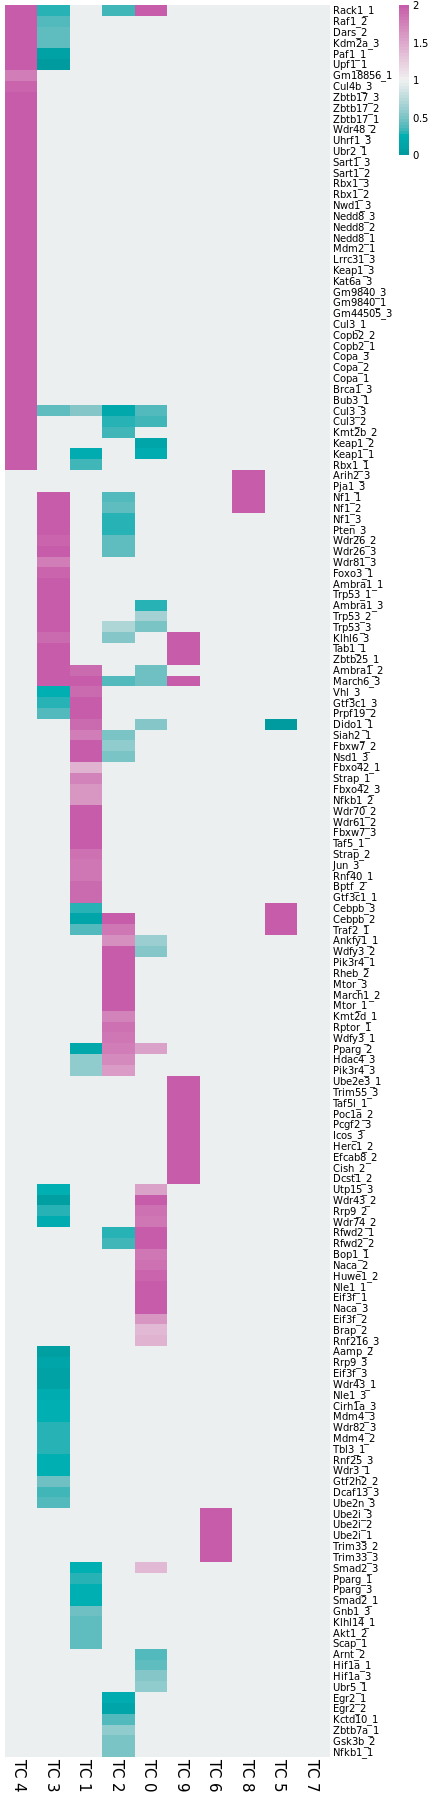

In [11]:
%%R -w 6 -h 25 -u in
rownames(kk) = paste0("TC ",0:9)
kk
library(pheatmap)
pheatmap(t(kk),cluster_rows=T, cluster_cols=T, 
         treeheight_col=0, treeheight_row=0, 
         color=hcl.colors(50, "Tropic"), clustering_method="ward.D2",
         fontsize_col=15)